# Lab CNN: Image Recognition 
## with Convolutional Neural Networks

### Necessity
ANN have disadvantages:
- require linear input - too big for average size images
- each hidden neuron is connected with every one from the previous layer - too many weights and complicated calculations

CNN idea based on human vision: one neuron in the visual cortex has a small local receptive field and a preference of shapes/stimuli to react. All neurons together build the whole visual field.

### Features

#### Input Layer
2- or 3-dimensional - more natural representation of the image

!["Explanation of image"](images/bw.png "pixels")
!["Explanation of image"](images/rgb.png "pixels")<br><br>
!["Explanation of image"](images/8-gif.gif "pixels")

Example: 2D image in 3 color layers

#### Convolutional Layer
Connects one hidden neuron with a small part of the previous layer neurons. <br>
A the small receptive field, called __convolution kernel__ is used as a _weight_ and a _filter_

!["Explanation of image"](images/convolutional.png "pixels")

#### Feature Maps
Each convolutional layer extracts specific features: feature maps. Each pixel of each feature map is an output of the convolutional layer.
Here are some examples.

!["Explanation of image"](images/filters.png "pixels")

The filter on the left might activate strongest when it encounters a horizontal line; the one in the middle for a vertical line.

In the convolution layer, the filters slide across the input, row by row, and act when they detect their shape.<br>
Sliding filters are how the CNN can learn meaningful features and later locate them in any part of the image.

!["Explanation of image"](images/kernels.gif "pixels")

#### Kernels
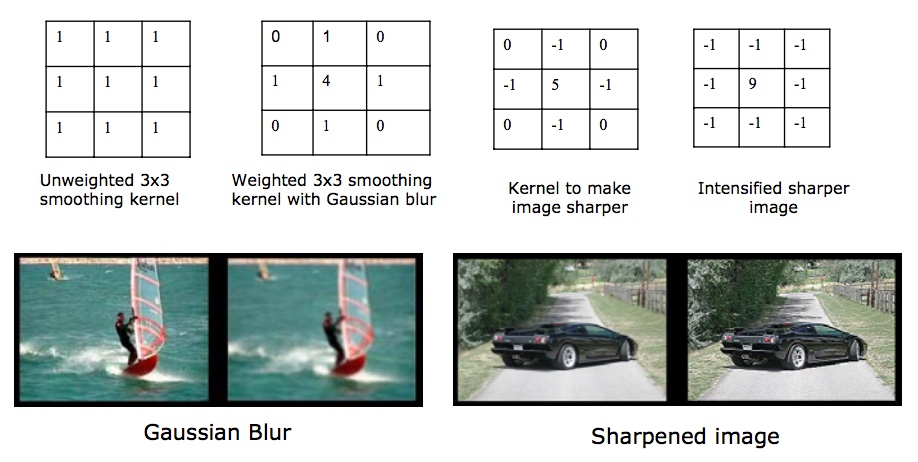

This is an illustration of a kernel:
!["Explanation of image"](images/kernel.gif "pixels")

__Strides__: the number of transitional positions <br>
__Padding__: adding pixels to the sides, needed for processing the edge pixels <br>
There are two common choices for padding:
- Valid: It means no padding
- Same: Here we apply padding so that the output size is the same as the input size

#### Pooling Layer
Used as _activation function_ and for reducing the size of the layer

Example with ReLu
!["Explanation of image"](images/relu.jpeg "pixels")

This is an illustration of a max pooling: four pixels are replaced by the one, which has the biggest value.
!["Explanation of image"](images/pooling.gif "Pooling")

#### Dropouts

To avoid overfitting, various models of networks can be used, but it is expensive. Alternatively, a single model can be used to simulate large number of different networks by _randomly dropping out nodes_ during training. This is called __dropout__ and used as effective regularization method for reducing the overfitting and improve the errors. It can be implemented at the __fully connected__ layers.
More about dropouts: https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/

#### Output Layer
A classic, fully connected layer is used as __output layer__.

The full picture:
!["Explanation of image"](images/fullcnn.png "CNN")

# Lab Task: Dog or Cat?

!["Cat or Dog"](images/catordog.gif "CatorDog")

In [ ]:
!python -m pip install opencv-python

In [ ]:
!pip install tflearn

In [ ]:
!pip install livelossplot

In [1]:
# Imports
import cv2                 # working with and resizing images
import numpy as np         # dealing with arrays and numbers
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data
from tqdm import tqdm      # extra UX, shows progress bar

In [2]:
# https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data
TRAIN_DIR_NH = 'cnn/train/not_hot_dog'
TRAIN_DIR_H = 'cnn/train/hot_dog'
TEST_DIR_NH = 'cnn/test/not_hot_dog'
TEST_DIR_H = 'cnn/test/hot_dog'
train_dircs = [TRAIN_DIR_NH,TRAIN_DIR_H]
test_dircs = [TEST_DIR_NH, TEST_DIR_H]
IMG_SIZE = 64
LR = 1e-4

#### Prepare Train Data

In [3]:
# function to get the image file name and create a label for it - one hot encoder
def set_label(folder):
        
    label = folder.split('/')[-1]
    if label == 'hot_dog': return [1,0]
    elif label == 'not_hot_dog': return [0,1]

In [4]:
# prepare train data
def create_train_data(dircs):
    # empty array, which will contain the train images and their labels
    train_data = []
    # for each image file in the train directory:
    for folder in dircs:
        for file in tqdm(os.listdir(folder)):
            # convert the file name into label by use of function above
            label = set_label(folder)
            print(label)
            # extend the file path for this image with the file name
            path = os.path.join(folder, file)

            # read the image from this file
            # img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.imread(path, cv2.IMREAD_UNCHANGED)

            # resize the image, so all have same size
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))       

            # add the image and its label into array 
            # train_data.append([np.array(img), np.array(label)])
            train_data.append([img, label])
        
    shuffle(train_data)
    np.save('models/train_data.npy', train_data)
    return train_data   

In [5]:
train_data = create_train_data(train_dircs)
test_data = create_train_data(test_dircs)

  8%|▊         | 21/249 [00:00<00:01, 205.49it/s]

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


 26%|██▌       | 65/249 [00:00<00:00, 209.39it/s]

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


 44%|████▍     | 110/249 [00:00<00:00, 211.28it/s]

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


 62%|██████▏   | 155/249 [00:00<00:00, 213.61it/s]

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


 81%|████████  | 201/249 [00:00<00:00, 219.28it/s]

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


  0%|          | 0/249 [00:00<?, ?it/s]

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]


 16%|█▌        | 39/249 [00:00<00:01, 194.04it/s]

[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]


 34%|███▎      | 84/249 [00:00<00:00, 206.59it/s]

[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]


 51%|█████     | 127/249 [00:00<00:00, 209.40it/s]

[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]


 69%|██████▊   | 171/249 [00:00<00:00, 210.16it/s]

[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]


 85%|████████▌ | 212/249 [00:01<00:00, 202.90it/s]

[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]


  0%|          | 0/250 [00:00<?, ?it/s]

[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[0, 1]
[0, 1]
[0, 1]


 16%|█▋        | 41/250 [00:00<00:01, 195.18it/s]

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


 34%|███▍      | 85/250 [00:00<00:00, 205.62it/s]

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


 51%|█████     | 128/250 [00:00<00:00, 207.19it/s]

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


 70%|██████▉   | 174/250 [00:00<00:00, 214.90it/s]

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


 89%|████████▉ | 223/250 [00:01<00:00, 227.31it/s]

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


  0%|          | 0/250 [00:00<?, ?it/s]

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]


 17%|█▋        | 43/250 [00:00<00:00, 209.24it/s]

[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]


 34%|███▍      | 85/250 [00:00<00:00, 205.45it/s]

[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]


 54%|█████▎    | 134/250 [00:00<00:00, 219.13it/s]

[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]


 72%|███████▏  | 179/250 [00:00<00:00, 211.57it/s]

[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]


 88%|████████▊ | 220/250 [00:01<00:00, 193.62it/s]

[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]


100%|██████████| 250/250 [00:01<00:00, 202.84it/s]


[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]


In [ ]:
train_data

#### Prepare X and Y sets From Train Data

In [ ]:
# split the training data into train and test, for testing while training
num = len(train_data)
train = train_data[:-num/2]
train_test = train_data[-num/2:]

In [7]:
# split both into X and Y
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
print(X.shape)
Y = np.array([i[1] for i in train])
print(Y.shape)

(498, 64, 64, 3)
(498, 2)


In [8]:
# split both into X and Y
X_test_set = np.array([i[0] for i in train_test]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
print(X_test_set.shape)
Y_test_set = np.array([i[1] for i in train_test])
print(Y_test_set.shape)

(500, 64, 64, 3)
(500, 2)


In [9]:
# Prepare image transformations
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

# normalisation
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

# create extra synthetic training data by flipping & rotating images
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)


Instructions for updating:
Colocations handled automatically by placer.


#### Build the CNN

In [10]:
# Buld the CNN
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tflearn.metrics import Accuracy

# Input: IMG_SIZE x IMG_SIZE x 3 color channels (red, green and blue)
network = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 3], name='input',
          # data_preprocessing=img_prep, 
          data_augmentation=img_aug)

# 1: Convolution layer with 32 filters, each 5x5x3
network = conv_2d(network, 32, 5, activation='relu')
# 2: Max pooling layer
network = max_pool_2d(network, 2)
                    
# 3: Convolution layer with 64 filters
network = conv_2d(network, 64, 5, activation='relu')
# 4: Max pooling layer
network = max_pool_2d(network, 2)

# 5: Convolution layer with 128 filters
network = conv_2d(network, 128, 5, activation='relu')
# 6: Max pooling layer
network = max_pool_2d(network, 2)

# 7: Convolution layer with 64 filters
network = conv_2d(network, 64, 5, activation='relu')
# 8: Max pooling layer
network = max_pool_2d(network, 2)
                     
# 9: Convolution layer with 32 filters
network = conv_2d(network, 32, 5, activation='relu')
# 10: Max pooling layer
network = max_pool_2d(network, 2)

# 11: Fully-connected 512 node layer
network = fully_connected(network, 1024, activation='relu')

# 12: Dropout layer to combat overfitting
network = dropout(network, 0.8)

# Output: Fully-connected layer with two outputs
network = fully_connected(network, 2, activation='softmax')


Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
# Configure how the network will be trained
acc = Accuracy(name="Accuracy")
network = regression(network, optimizer='adam', learning_rate=LR, 
                     loss='categorical_crossentropy', metric=acc, name='target')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [12]:
# Wrap the network in a model object
model = tflearn.DNN(network, checkpoint_path='tmp/log',
                    tensorboard_verbose = 3, max_checkpoints = 1,
                    tensorboard_dir='tmp/log')
# parameters for the log files

Instructions for updating:
Use tf.cast instead.


#### Train the CNN

In [13]:
# Train model for 5 epochs
model.fit({'input': X}, {'target': Y}, n_epoch=100, 
          validation_set=({'input': X_test_set}, {'target': Y_test_set}), 
          snapshot_step=500, show_metric=True, run_id='MyModel12CNNC')

# see http://tflearn.org/models/dnn/ for more

Training Step: 495  | total loss: 0.34095 | time: 11.974s
| Adam | epoch: 062 | loss: 0.34095 - Accuracy: 0.8902 -- iter: 448/498
Training Step: 496  | total loss: 0.32624 | time: 17.074s
| Adam | epoch: 062 | loss: 0.32624 - Accuracy: 0.8952 | val_loss: 0.90182 - val_acc: 0.6600 -- iter: 498/498
--


KeyboardInterrupt: 

In [ ]:
# save the model
model.save('models/MyModel12CNNC.tflearn')

In [ ]:
# See Tensorboard at tensorboard --logdir='/tmp/tflearn_logs'
# Tensorboard default address: http://0.0.0.0/6006

In [ ]:
!tensorboard --logdir='tmp/tflearn_logs/'

### Test the Model with Unlabeled Data

In [ ]:
# load the model
model.load('models/MyModel12CNNC.tflearn')

In [ ]:
# number of training files
list = os.listdir(TEST_DIR)
n_files = len(list)
n_files

In [ ]:
# prepare test data - files have no word labels
def process_test_data(list):
    test_data = []
    for file in tqdm(list):
        # create file path
        path = os.path.join(TEST_DIR, file)
        
        # get the file name (the file number)
        img_num = file.split('.')[0]
        
        # get the image data from this file
        # img_data = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data = cv2.imread(path,cv2.IMREAD_UNCHANGED)        
        img_data = cv2.resize(img_data, (IMG_SIZE,IMG_SIZE))
        
        # store it into array
        # test_data.append([np.array(img_data), img_num]) 
        test_data.append([img_data, img_num]) 
        
    shuffle(test_data)
    np.save('models/test_data.npy', test_data)
    return test_data

In [ ]:
test_data = process_test_data(list)

In [ ]:
# Test and plot
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16, 12))

for num, data in enumerate(test_data[1000:1025]):
    # cat: [1,0]
    # dog: [0,1]
    
    image = data[0]
    id = data[1]   
    
    original = image
    data = image.reshape(IMG_SIZE,IMG_SIZE,3)   
    
    # predict
    predicted = model.predict([data])[0]
    #print(f"cat: {predicted[0]}, dog: {predicted[1]}")
    
    if np.argmax(predicted) == 1: 
        result='not_hotdog'
    else: 
        result='hotdog'
            
    y = fig.add_subplot(5, 5, num+1)
    y.imshow(original, cmap='gray')
    # y.imshow(original)
    
    plt.title(result)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()


### Test with Unseen Image

In [ ]:
# load your test image
img = cv2.imread('images/siam.jpg')
print('Original Dimensions : ', img.shape)

In [ ]:
# resize
img = cv2.resize(img, (IMG_SIZE,IMG_SIZE)) 
print('Resized Dimensions : ', img.shape)

In [ ]:
# predict
predicted = model.predict([data])[0]
print(f"cat: {predicted[0]}, dog: {predicted[1]}")
if np.argmax(predicted) == 1: 
    result='hotdog'
else: 
    result='not_hotdog'
print(result)

In [ ]:
cv2.imshow('result', img)
cv2.imwrite('result.jpg',img)
cv2.waitKey(0)       

#### How to Get Better Result
There's a lot of effort required, such as:

- Bigger networks with more layers: ResNet - the winner of the 2015 ImageNet Large Scale Visual Recognition Challenge (ILSVRC) - has 152 layers. (And if that wasn’t enough, to win they competition they used an ensemble of ResNets). 
- Pre-training: the winner of the Kaggle Dogs vs. Cats competition wrote, "My system was pre-trained on ImageNet (ILSVRC12 classification dataset) and subsequently refined on the cats and dogs data". The ImageNet ILSVRC12 dataset contains 10m labelled images depicting 10k objects. Even if there aren't many cats and dogs in the pre-training data, it helps the CNN learn useful filters for distinguishing objects in images. This is sometimes called "transfer learning." 
- Larger, higher-resolution images, downsizing sacrifices information; larger images have more detail and afford larger filters.
- Bagging, ensembles and using CNNs as inputs to other ML techniques: the 8th placed contestant in Kaggle's competition described some of their approaches on their blog.

__From__: http://www.subsubroutine.com/sub-subroutine/2016/9/30/cats-and-dogs-and-convolutional-neural-networks


Images from <br>
- https://towardsdatascience.com/image-classifier-cats-vs-dogs-with-convolutional-neural-networks-cnns-and-google-colabs-4e9af21ae7a8 
- http://web.pdx.edu/~jduh/courses/Archive/geog481w07/Students/Ludwig_ImageConvolution.pdf
- http://www.subsubroutine.com/sub-subroutine/2016/9/30/cats-and-dogs-and-convolutional-neural-networks
- https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/